In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

# for aesthetic plots
def science_plot(fontsize=9, scistyle=True, show_latex=True):
    # Default settings (applied to both 2D and 3D)
    if scistyle:
        import scienceplots
        plt.style.use(['science','grid','notebook'])
    if show_latex:
        plt.rcParams.update({
            # Latex Use
            'text.usetex'     : True,        # Use LaTeX for text rendering
            'font.family'     : 'serif',     # Set font family to serif
        })

    plt.rcParams.update({
        # Fontsizes
        'font.size'       : fontsize,    # General font size
        'axes.titlesize'  : fontsize,    # Font size of the axes title
        'axes.labelsize'  : fontsize,    # Font size of the axes labels
        'xtick.labelsize' : fontsize,    # Font size of the x-axis tick labels
        'ytick.labelsize' : fontsize,    # Font size of the y-axis tick labels
        'legend.fontsize' : fontsize,    # Font size of the legend
        'figure.titlesize': fontsize,    # Font size of the figure title

        # Legend
        'legend.fancybox' : False,       # Disable the fancy box for legend
        'legend.edgecolor': 'k',         # Set legend border color to black
    })

        # # Grid settings
        # "grid.linestyle": "--",
        # "grid.color": "gray",
        # "grid.linewidth": 1,
        # "axes.grid": True,

        # # Minor grid (default, but may be overridden for 3D)
        # "xtick.minor.visible": True,
        # "ytick.minor.visible": True,

        # # Tick settings (both major & minor)
        # "xtick.direction": "in",
        # "ytick.direction": "in",
        # "xtick.top": True,
        # "xtick.bottom": True,
        # "ytick.left": True,
        # "ytick.right": True,

        # 'colorbar.ticks.direction': 'out',

        # # Major ticks
        # "xtick.major.width": 1,
        # "ytick.major.width": 1,
        # "xtick.major.size": 5,
        # "ytick.major.size": 5,

        # # Minor ticks
        # "xtick.minor.width": 1,
        # "ytick.minor.width": 1,
        # "xtick.minor.size": 2.5,
        # "ytick.minor.size": 2.5,

        # # Spine (border) width
        # "axes.linewidth": 1
science_plot()



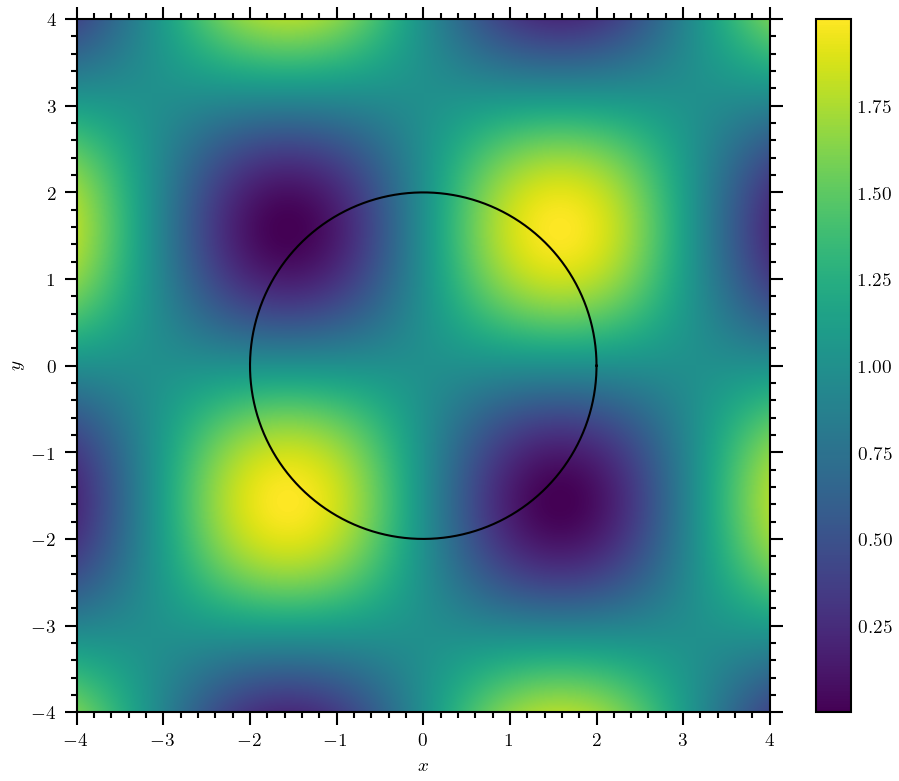

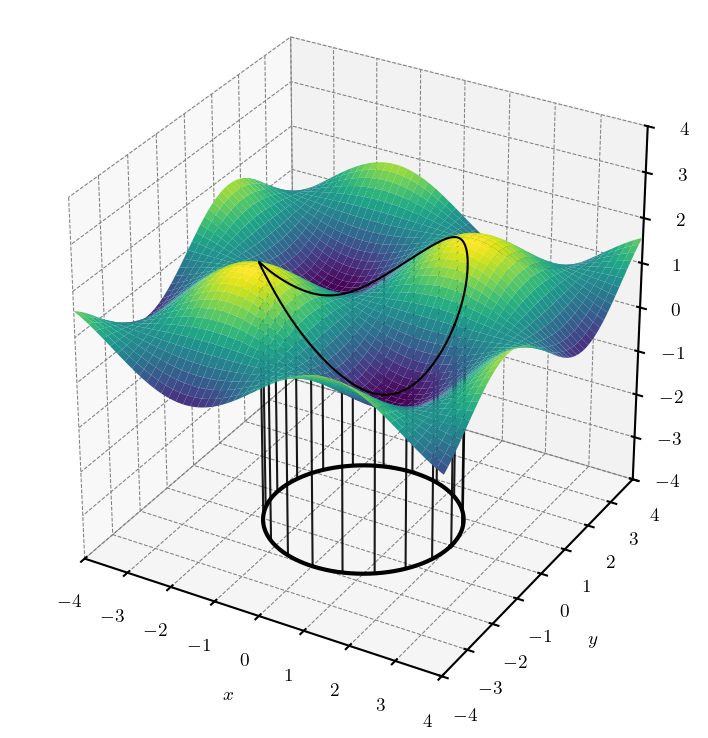

In [18]:
import numpy as np
import matplotlib.pyplot as plt

dx = dy = 0.01
lims = (-4, 4)
xv = np.arange(*lims, dx)
yv = np.arange(*lims, dy)
x, y = np.meshgrid(xv, yv)
r = np.array([x, y])

def scalar_function(r):
    x  = r[0]
    y  = r[1]
    fr = np.sin(x)*np.sin(y) + 1
    # fr = np.sin(2*x)*np.sin(2*y)+2*np.exp(-(x*x+y*y)/4) 
    # fr = np.zeros_like(x) * np.zeros_like(y) + 1
    return fr 

zf = scalar_function(r)

# create 3d plot
plt.figure(dpi=150)
plt.imshow(zf, extent = [*lims,*lims],cmap='viridis', origin="lower")
plt.colorbar()
t = np.linspace(0,1,1000)
x,y = 2*np.cos(2*np.pi*t), 2*np.sin(2*np.pi*t) #0.5*np.cos(2*np.pi*t)+0.5,4*np.sin(2*np.pi*t)
z_line = scalar_function([x,y])
plt.plot(x,y,'k',linestyle = '-', linewidth = 1)
plt.tick_params(which='both', direction='out')
plt.grid(False)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.show()

# Create 3D figure
fig = plt.figure(dpi=150)
ax = fig.add_subplot(111, projection='3d')

# Plot with phase-based colors
surf = ax.plot_surface(
    r[0], r[1], zf,
    cmap = 'viridis',
    edgecolor='none',
    antialiased=True,
    zorder = 3
    #rstride=1, cstride=1
)

step = 50
for xi, yi, zi in zip(x[::step], y[::step], z_line[::step]):  
    ax.plot([xi, xi], [yi, yi], [lims[0], zi], 
            color='black', 
            linestyle='-', 
            linewidth=1,
            alpha=0.9,
            zorder=1)

ax.plot(x,y,z_line,color='k',linewidth =1,zorder = 4)
ax.plot(x,y,np.zeros_like(x)+lims[0],'k')
ax.set_xlim(*lims)
ax.set_ylim(*lims)
ax.set_zlim(*lims)
ax.set_box_aspect([1,1,1])
# Disable minor ticks
ax.grid(linestyle = '-', color = 'gray', linewidth = 0.5)

for axis in [ax.xaxis, ax.yaxis, ax.zaxis]:
    # Style the grid
    axis._axinfo['grid']['color'] = (0.5, 0.5, 0.5, 1)  # Gray
    axis._axinfo['grid']['linewidth'] = 0.5
    axis._axinfo['grid']['linestyle'] = '--'
    # Remove minor ticks
    axis.set_minor_locator(plt.NullLocator())
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
plt.show()


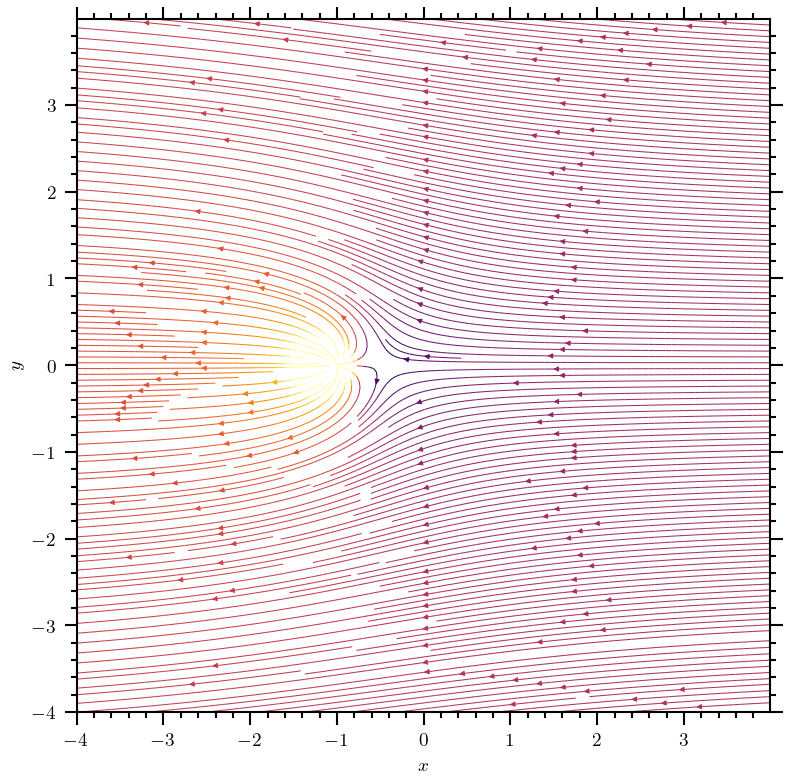

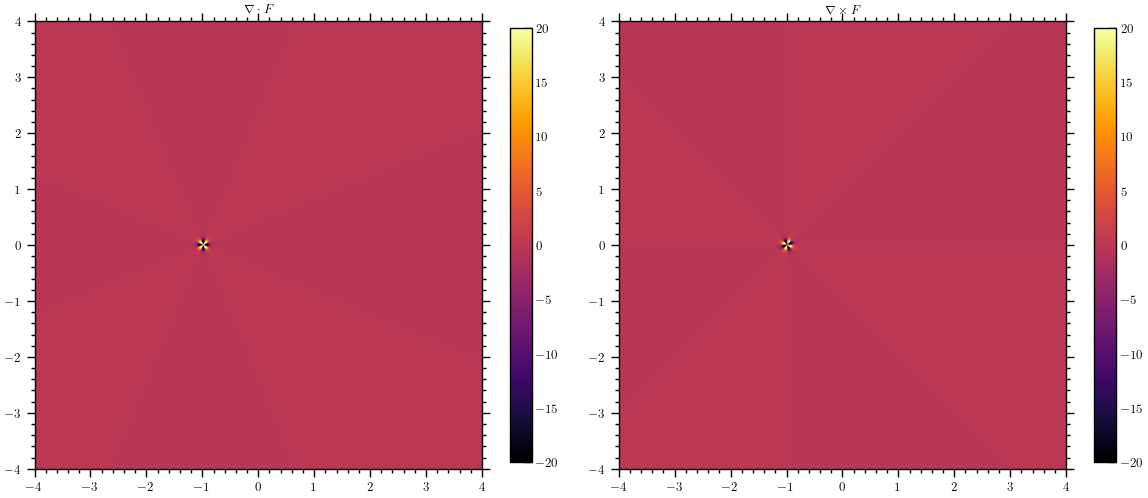

In [22]:

dx = dy = 0.01
lims = (-4, 4)
xv = np.arange(*lims, dx)
yv = np.arange(*lims, dy)
X, Y = np.meshgrid(xv, yv)
r = np.array([X, Y])

def _process_input(r):
    """Helper function that preserves input dimensionality"""
    r = np.asarray(r)
    if r.ndim == 1:  # Single vector [x,y]
        return r, 'vector'
    elif r.shape[0] == 2 and r.ndim == 2:  # Series of vectors [[x...],[y...]]
        return r, 'series'
    return r, 'meshgrid'  # Already in meshgrid format

def _format_output(result, input_type):
    """Restores original input format"""
    if input_type == 'vector':
        return result.reshape(2)
    elif input_type == 'series':
        return result.reshape(2, -1)
    return result

def rotor_field(r, r0=[0, 0], a=1, eps=1e-12):
    """Returns same format as input"""
    r, input_type = _process_input(r)
    if input_type == 'series':
        dr = r - np.array(r0)[:, None]  # Shape (2, N)
    else:
        dr = r - np.array(r0)[:, None, None]  # Shape (2, 1, 1) or (2, M, N)
    r_squared = np.sum(dr**2, axis=0)
    r_squared[r_squared < eps] = eps
    rot_matrix = np.array([[0, 1], [-1, 0]]).T
    if input_type == 'series':
        v_rot = rot_matrix @ dr  # Simple matrix multiplication for series
    else:
        v_rot = np.einsum('ij,j...->i...', rot_matrix, dr)
    result = (a / (2 * np.pi * r_squared)) * v_rot
    return _format_output(result, input_type)

def dipole_field(r, r0=[0,0], a=1, theta=0, deg=False, eps = 1e-12, mode = "vectordef"):
    """Returns same format as input"""
    r, input_type = _process_input(r)
    
    # Handle subtraction based on input type
    if input_type == 'series':
        dr = r - np.array(r0)[:, None]  # Shape (2, N)
    else:
        dr = r - np.array(r0)[:, None, None]  # Shape (2, 1, 1) or (2, M, N)
    
    x, y = dr[0], dr[1]
    
    # Handle grid spacing
    if input_type == 'meshgrid':
        dx = x[0,1] - x[0,0] if x.shape[1] > 1 else 1.0
        dy = y[1,0] - y[0,0] if y.shape[0] > 1 else 1.0
    else:
        dx = dy = 1.0
    
    r2 = x**2 + y**2
    r2[r2 < eps] = eps
    r4 = r2**2
    r4[r4 < eps] = eps
    if mode == "scalardef":
        F = -  a * x / r2
        if input_type == 'meshgrid':
            Fx = np.gradient(F, dx, axis=1)
            Fy = np.gradient(F, dy, axis=0)
        else:
            Fx = np.gradient(F, dx)
            Fy = np.gradient(F, dy)
    if mode == "vectordef":
        Fx = (x*x - y*y) / (r4)
        Fy = (2 * x * y) / (r4)

    if deg:
        theta = np.deg2rad(theta)
    
    cos, sin = np.cos(theta), np.sin(theta)
    resultx =  cos*Fx + sin*Fy
    resulty = -sin*Fx + cos*Fy
    result = np.array([resultx,resulty])
    return _format_output(result, input_type)

def linear_field(r, theta=0, mag=1, deg=False):
    r, input_type = _process_input(r)
    if deg:
        theta = np.deg2rad(theta)
    vx = mag * np.cos(theta) * np.ones_like(r[0])
    vy = mag * np.sin(theta) * np.ones_like(r[1])
    result = np.array([vx, vy])
    return _format_output(result, input_type)

def source_field(r, r0=[0, 0], a=1, eps=1e-12):
    """Returns same format as input"""
    r, input_type = _process_input(r)
    # Handle subtraction based on input type
    if input_type == 'series':
        dr = r - np.array(r0)[:, None]  # Shape (2, N)
    else:
        dr = r - np.array(r0)[:, None, None]  # Shape (2, 1, 1) or (2, M, N)
    r_norm = np.sqrt(np.sum(dr**2, axis=0))
    r_norm[r_norm < eps] = eps
    result = (a / r_norm**2) * dr
    return _format_output(result, input_type)

def vector_field(r):
    v_linear = linear_field(r,0,10)
    v_source = rotor_field(r, [-1, 0], -20)
    v_rotor  = rotor_field(r, [1, 0], 20)
    #return dipole_field(r, theta = 90, deg = True) #rotor_field(r,[-1,0],-2) + rotor_field(r,[1,0],2) + source_field(r,[0,-2],.15)
    return source_field(r,a=5,r0=[-1,0]) + linear_field(r,mag=-10,theta=0)
# quadrupole  (source_field(r,[-1,0],2) + source_field(r,[-0.5,0],-2) + source_field(r,[0,0],-2) + source_field(r,[0.5,0],2))
v = vector_field(r)  # Shape (2, N, M)
vx, vy = v[0], v[1]  # Unpack components
vmag = np.sqrt(vx**2 + vy**2)
max_val = min(20, np.max(vmag))
plt.figure(dpi=150)
plt.streamplot(
    X, Y,  # x and y coordinates
    vx, vy,  # vector components
    color=np.clip(vmag, 0, max_val),
    cmap="inferno",
    density=4,
    linewidth=0.5,
    arrowsize=0.5
)
plt.grid(False)
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.tick_params(which='both', direction='out')
plt.gca().set_aspect("equal")
plt.show()


# For a vector field v = (Fx, Fy) with shape (2, Ny, Nx)
dFx_dx = np.gradient(v[0], axis=1) / dx  # ∂Fx/∂x
dFx_dy = np.gradient(v[0], axis=0) / dy  # ∂Fx/∂y
dFy_dx = np.gradient(v[1], axis=1) / dx  # ∂Fy/∂x
dFy_dy = np.gradient(v[1], axis=0) / dy  # ∂Fy/∂y
# print("dFx_dx",dFx_dx)
# print("dFx_dy",dFx_dy)
# print("dFy_dx",dFy_dx)
# print("dFy_dy",dFy_dy)
divF = dFx_dx + dFy_dy 
curlF = dFy_dx - dFx_dy
# print(divF)
# print(curlF)
# plot the imshow of div and curl
# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Divergence plot
im1 = ax1.imshow(divF, cmap='inferno', 
                extent=[*lims,*lims],
                origin='lower', 
                vmin=-20,vmax=20)
ax1.set_title(r'$\nabla\cdot F$')
ax1.grid(False)
ax1.tick_params(which='both', direction='out')
fig.colorbar(im1, ax=ax1, shrink=0.92)

# Curl plot
im2 = ax2.imshow(curlF, cmap='inferno', 
                extent=[*lims,*lims],
                origin='lower',
                vmin=-20,vmax=20)
ax2.set_title(r'$\nabla\times F$')
ax2.grid(False)
ax2.tick_params(which='both', direction='out')
fig.colorbar(im2, ax=ax2, shrink=0.92)

plt.tight_layout()
plt.show()

Area integral over curve region = 12.565150


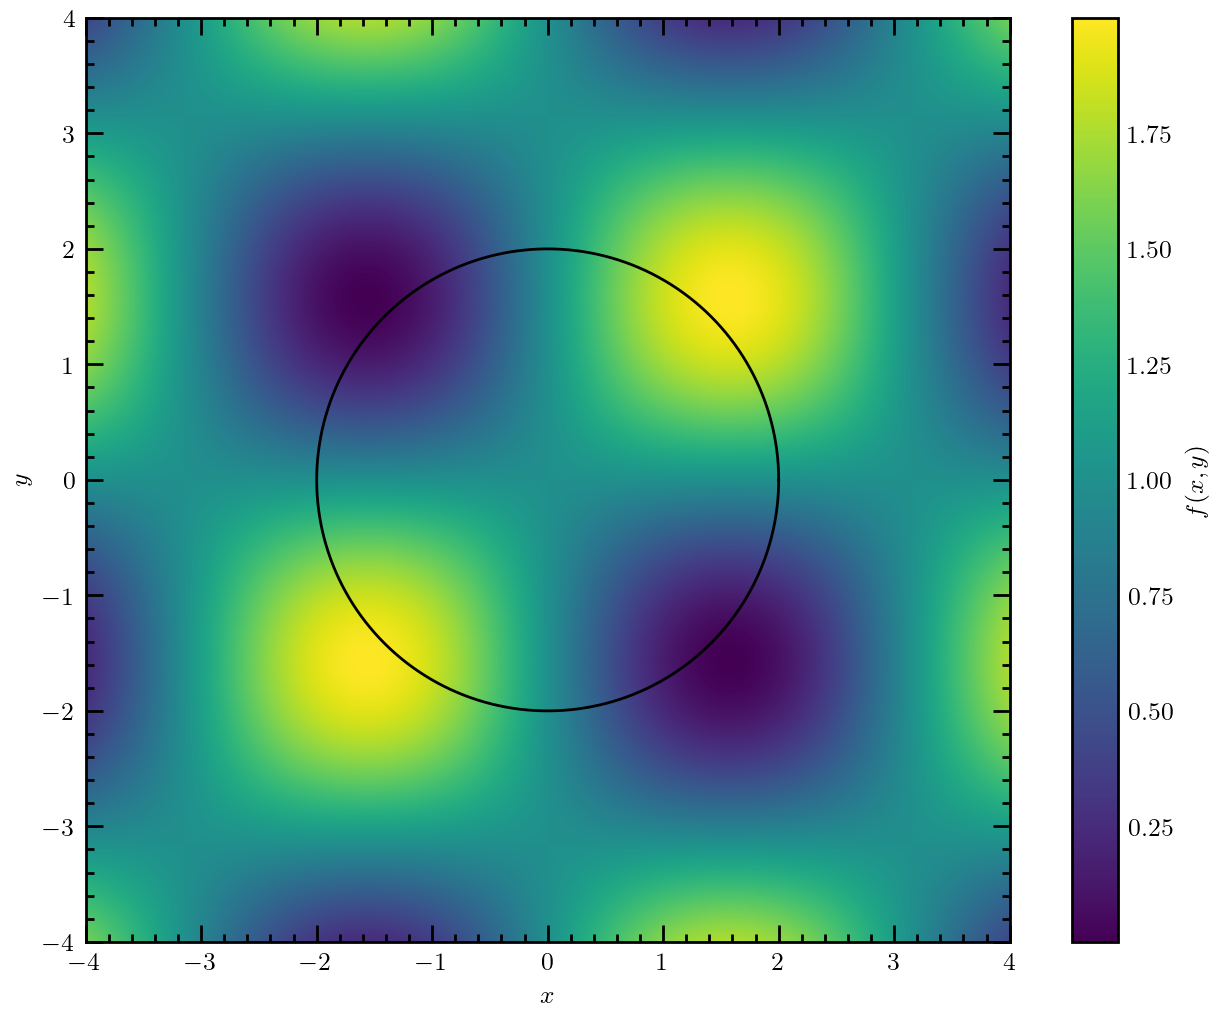

In [5]:

from matplotlib.path import Path
x_grid, y_grid = np.meshgrid(xv, yv)
r = np.array([x_grid, y_grid])

zf = scalar_function(r)
# Parametric closed curve (example: ellipse)
t = np.linspace(0, 1, 1000)
# Create path for the curve
curve_points = np.vstack((x, y)).T
path = Path(curve_points)

# Flatten grid and test if inside
points = np.vstack((x_grid.ravel(), y_grid.ravel())).T
mask = path.contains_points(points).reshape(x_grid.shape)

# mask = ((r[0]-r0[0])**2+(y[0]-y0[0])**2) <= 2**2
dA = dx * dy
# Area integral via Riemann sum
integral_value = np.sum(zf * mask) * dA
print(f"Area integral over curve region = {integral_value:.6f}")

# Plot region and curve
plt.figure(dpi=200)
plt.imshow(zf, extent=[*lims, *lims], origin='lower', cmap='viridis')
plt.plot(x, y, 'k', lw=1)
plt.grid(False)
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.colorbar(label='$f(x,y)$')
plt.show()


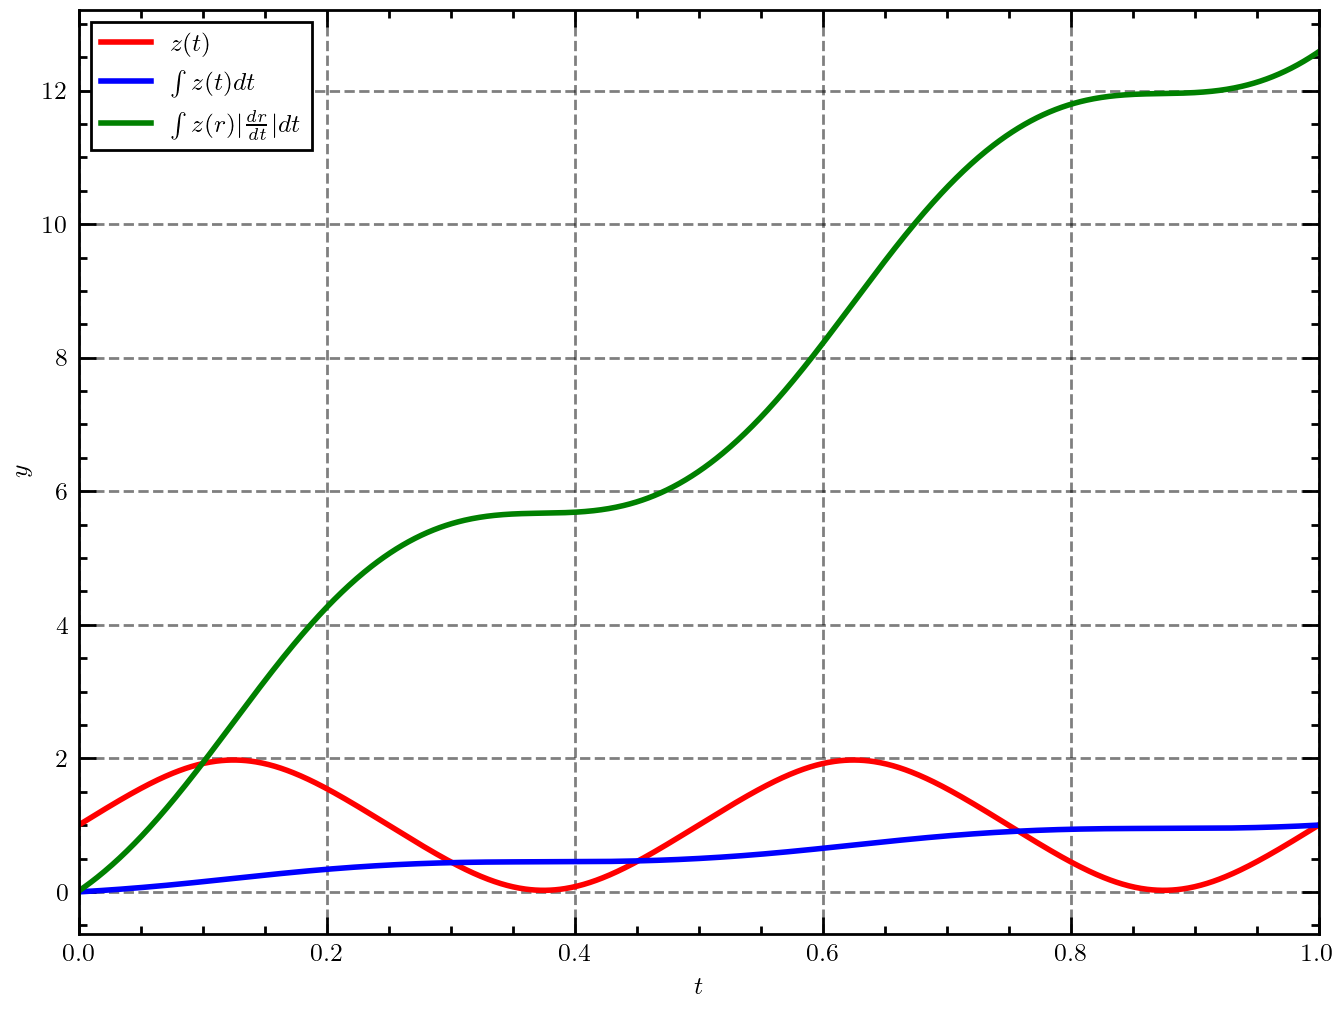

In [6]:
z = scalar_function([x, y])  # Use consistent variable name

# Plot original function
plt.figure(dpi=200)
plt.plot(t, z, 'r', label=r'$z(t)$')

# Set axis limits
step = 0.5
y_min = np.floor(np.min(z) / step) * step  
y_max = np.ceil(np.max(z) / step) * step    
# plt.ylim(y_min, )
plt.xlim(0, 1)

# Time integral
dt = t[1] - t[0]
intzdz = np.cumsum(z) * dt
plt.plot(t, intzdz, 'b', label=r'$\int z(t)dt$')

# Line integral calculation
dx_dt = np.gradient(x, dt)
dy_dt = np.gradient(y, dt)
dr_dt_norm = np.sqrt(dx_dt**2 + dy_dt**2)  # Pointwise norm

intfzrdz = np.cumsum(z * dr_dt_norm) * dt

plt.plot(t, intfzrdz, 'g', label=r'$\int z(r)|\frac{dr}{dt}|dt$')

plt.xlabel('$t$')
plt.ylabel('$y$')
plt.legend()
plt.grid(True)
plt.show()

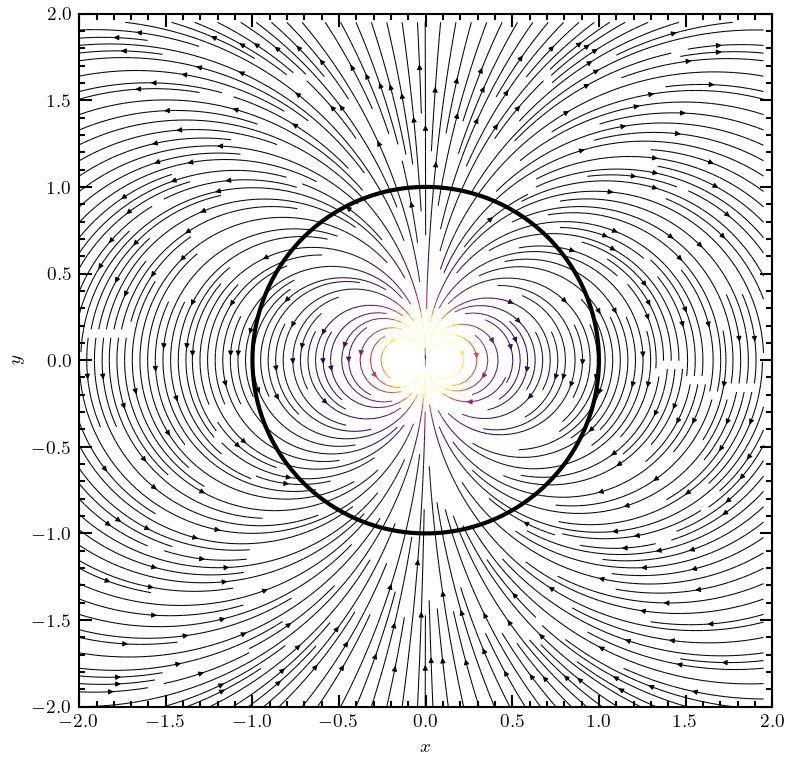

(0.0, 1.0)

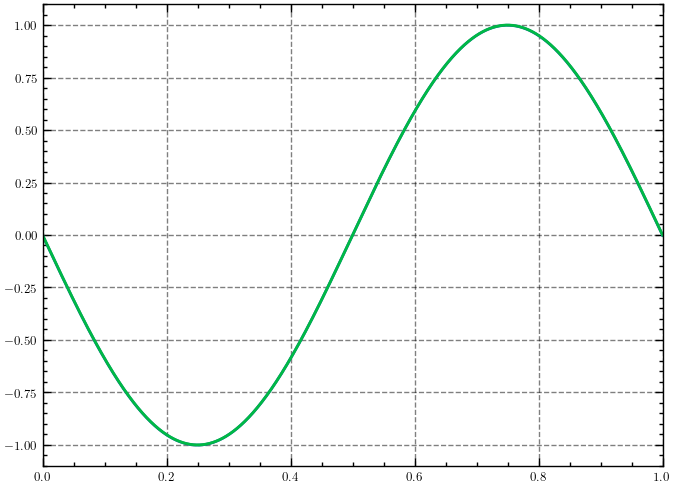

In [7]:
dx = dy = 0.05 
lims = -2,2
xv = yv = np.arange(*lims,dx)
x, y = np.meshgrid(xv,yv)
r = np.array([x,y])


def vector_function (r):
    return dipole_field(r, theta = 90, deg = True)
v = vector_function (r) #+ source_field(r,a=0,r0=[0,1.5]) + dipole_field(r,a=1,theta = np.pi/2)
vx, vy = v[0], v[1]  # Unpack components
vmag = np.sqrt(vx**2 + vy**2)
max_val = min(20, np.max(vmag))

t = np.linspace(0,1,4000)
dt = t[1]-t[0]
def circoid(t,r=1,a=1,b=1):
    xt = r*a*np.cos(2*np.pi*t)
    yt = r*b*np.sin(2*np.pi*t)
    return np.array([xt,yt])
rl = circoid(t, r=1)
vl = vector_function (rl)

plt.figure(dpi=150)
plt.streamplot(
    x, y,  # x and y coordinates
    vx, vy,  # vector components
    color=np.clip(vmag, 0, max_val),
    cmap="inferno",
    density=3,
    linewidth=0.5,
    arrowsize=0.5
)
plt.plot(rl[0],rl[1],"k")
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.gca().set_aspect("equal")
plt.xlim(*lims)
plt.ylim(*lims)
plt.grid(False)
plt.show()

dxdt = np.gradient(rl[0])/dt
dydt = np.gradient(rl[1])/dt
drdt = np.array([dxdt,dydt])
vline_int = np.cumsum(np.sum(vl*drdt, axis = 0))*dt 
plt.figure(dpi = 100)
plt.plot(t,vline_int)
plt.plot(t,-np.sin(2*np.pi*t))
lim = max(max(np.max(vline_int),np.abs(np.min(vline_int))),1)
# plt.ylim(-lim,lim)
plt.xlim(0,1)


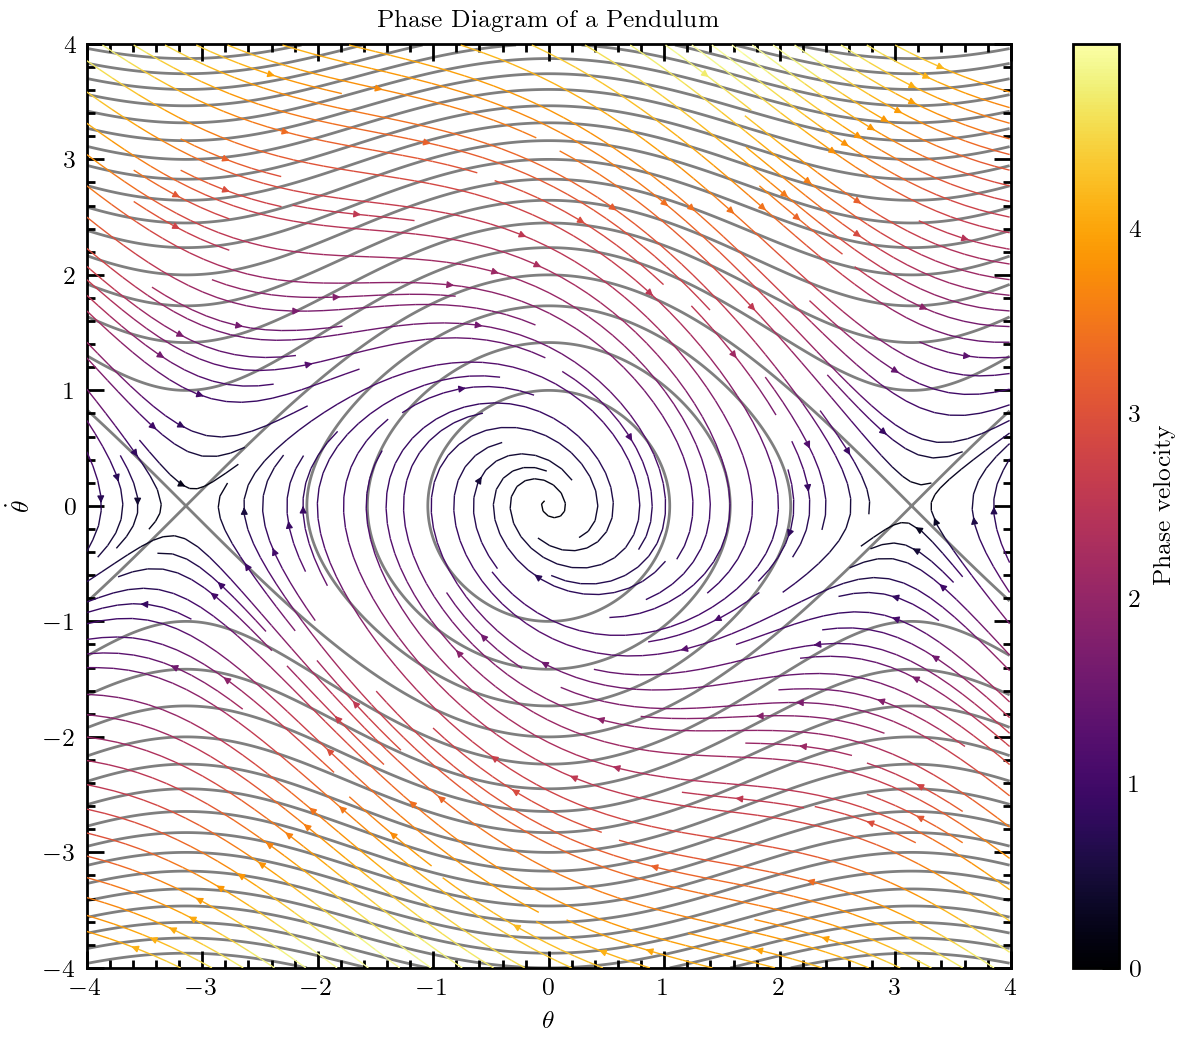

In [23]:

dx, dxdot = 0.01,0.01 
lims = -4,4
x    = np.arange(*lims, dx)
xdot = np.arange(*lims, dx)
xgrid, xdotgrid = np.meshgrid(x,xdot)

def time_derivative(x,xdot):
    g = 1 
    a = 0.5
    dxdt   = xdot 
    d2xdt2 = -a*xdot - g * np.sin(x)
    return np.array([dxdt,d2xdt2])

v = time_derivative(xgrid,xdotgrid)
dxdt  = v[0] 
xddot = v[1]
mag = np.sqrt(dxdt**2+xddot**2)
maxmag = 20
mag[mag>maxmag] = maxmag
E = xdotgrid**2/2 - np.cos(xgrid)

lv = np.arange(-50,50,0.5)
plt.figure(dpi=200)

plt.contour(
    xgrid, xdotgrid, E,
    levels = lv,
    linestyles = "-",
    colors = 'k' ,
    linewidths = 1,
    alpha = 0.5,
    zorder = 1
 
)

plt.streamplot(
    x , xdot,
    dxdt, xddot, 
    color = mag,
    cmap = "inferno",
    linewidth = 0.5, 
    arrowsize = 0.5,
    density = 2,
    zorder = 3
)
plt.title("Phase Diagram of a Pendulum")
plt.colorbar(label = "Phase velocity")
plt.xlabel(r'$\theta$')
plt.ylabel(r'$\dot \theta$')
plt.gca().set_aspect("equal")
plt.xlim(*lims)
plt.ylim(*lims)
plt.grid(False)
plt.show()


In [9]:
pay_per_hour    = 81 
hours_per_month = 60
pay_per_month   = pay_per_hour * hours_per_month 
print(pay_per_month)



4860
